# Hypothesis - Device Activity

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample

**Read Data**

In [2]:
# read train_X and train_y from /data/processed/
train_X = pd.read_csv('../data/processed/X_train.csv')
train_y = pd.read_csv('../data/processed/y_train.csv')

# combine into data
data = pd.concat([train_y, train_X], axis=1)

# check shape and head
print(f'data shape: {data.shape}')
data.head()

data shape: (52776, 31)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.9,0.383245,28,26,30,0.017751,-1.00000,AB,1125,...,11,0,200.0,0,INTERNET,20.301149,macintosh,0,1,2
1,0,0.8,0.717703,-1,63,40,0.011542,52.68933,AA,791,...,20,0,200.0,0,INTERNET,4.309454,other,1,1,2
2,0,0.3,0.517523,-1,78,20,0.008581,-1.00000,AB,1844,...,1,1,1500.0,0,INTERNET,4.491135,other,0,1,0
3,0,0.9,0.358260,-1,45,40,0.016844,-1.00000,AC,1150,...,-1,0,500.0,0,INTERNET,1.507028,windows,1,2,2
4,0,0.8,0.183328,11,92,20,0.015774,-1.00000,AD,525,...,1,0,500.0,0,INTERNET,2.000494,linux,1,1,1


## Feature Engineering

In [3]:
import importlib.util

abs_filepath = '/Users/cheongkyler/Documents/Y4S1/DSA4263/Detect Fraudulent Bank Accounts/scripts/feature_eng_hyp_device_activity.py'

# Replace '/absolute/path/to/your/module/module_name.py' with the actual absolute file path
spec = importlib.util.spec_from_file_location("feature_eng_hyp_device_activity", abs_filepath)
your_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(your_module)

In [4]:
data_generated = your_module.generateDeviceActivityFeatures(data)

# check shape and head
print(f'data_generated shape: {data_generated.shape}')
data_generated.head()

Feature 1 created.
Feature 1 created.


/Users/cheongkyler/Documents/Y4S1/DSA4263/Detect Fraudulent Bank Accounts/scripts/feature_eng_hyp_device_activity.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_01'] = 'A'; group02['FE_01'] = 'B'; group03['FE_01'] = 'C'; group04['FE_01'] = 'D'; group05['FE_01'] = 'E'
/Users/cheongkyler/Documents/Y4S1/DSA4263/Detect Fraudulent Bank Accounts/scripts/feature_eng_hyp_device_activity.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_01'] = 'A'; group02['FE_01'] = 'B'; group03['FE

Feature 3 created.
Feature 4 created.
Feature 5 created.
Features for Device Activity Hypothesis generated.
data_generated shape: (52776, 36)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,FE_01_device_os_emails_prob,FE_02_keep_alive_device_emails_prob,FE_03_source_foreign_request_prob,FE_04_device_os_foreign_request_prob,FE_05_device_os_prob
128,0,0.5,0.549786,-1,50,40,27.293091,-1.000000,AC,1298,...,4.508612,windows,0,0,1,0.6047,0.352,0.1627,0.3027,0.3083
1422,1,0.7,0.174847,-1,61,70,0.003595,9.522029,AB,1486,...,3.560275,windows,0,0,2,0.6047,0.352,0.1627,0.3027,0.3083
1572,0,0.8,0.849118,-1,202,40,0.010027,-1.000000,AC,3229,...,3.535784,windows,0,0,1,0.6047,0.352,0.1627,0.3027,0.3083
2380,0,0.7,0.366895,-1,300,50,0.017651,41.225517,AA,3009,...,6.786212,windows,0,0,3,0.6047,0.352,0.1627,0.3027,0.3083
2739,1,0.7,0.359558,-1,65,40,0.011045,-1.000000,AC,673,...,6.204049,windows,0,0,5,0.6047,0.352,0.1627,0.3027,0.3083


## EDA Bank Activity and Device Activity

**Hypothesis: Fraudulent Bank Accounts have unique characteristics in relation to how people committing fraud uses their device.**

**Columns considered**

* Device Activity:
    * `session_length_in_minutes`
    * `device_os`
    * `keep_alive_session`
    * `device_distinct_emails_8w`
    * `source`
    * `foreign_request`

1. `device_os`
    * More likely to use a phone that has more lax security i.e. windows
    * The more popular the phone, the higher chance of being used for fraud as well.

2. `keep_alive_session` and `device_distinct_emails_8w`
    * More likely to have more than 1 email in each device. --> more emails to create more fake accounts.
    * People committing fraud often have multiple spare phones and each device will be used to make these fraudulent bank account applications. Thus, for convienience, the fraudster is likely to turn off keep_alive_session. i.e. keep_alive_session == 0.
3. `source` and `foreign_request`
    * If a fraudster wants to avoid detection, he is likely to spoof his location and on his device. Therefore, `foreign_request` would be from a foreign country (thus value == 1) and since VPNs or location spoofing is more commonly found using laptop devices, then there is also a higher chance he is using "INTERNET" instead of using the "TELEAPP" to apply.

**Explanation of Columns**

| Column Name | Description | Link to Fraud |
|:------------|:------------|:--------------|
| device_distinct_emails_8w | No. of distinct emails in banking website from the used device in last 8 weeks. <br> Simply put, if I use my email address to log into the banking website, <br> then I effectively used 1 distinct email address. <br>If I leave the phone unattended for 8 weeks, then this value becomes 0 due to inactivity for 8 weeks. | Spare phones are commonly used to prevent banking companies from tracking them. <br> Thus, able to explain the inactivity. When the phone is actually used, <br>the fraudsters are likely to use more than 2 distinct email address for 2 accounts using the same phone.


In [5]:
# select columns related to device activity
device_activity  = ['fraud_bool', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'source', 'foreign_request']
device_activity_df = data[device_activity]

# change all columns to cateogrical except for session_length_in_minutes
device_activity_df['device_os'] = device_activity_df['device_os'].astype('category')
device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype('category')
device_activity_df['source'] = device_activity_df['source'].astype('category')
device_activity_df['foreign_request'] = device_activity_df['foreign_request'].astype('category')
device_activity_df['fraud_bool'] = device_activity_df['fraud_bool'].astype('category')
device_activity_df['device_distinct_emails_8w'] = device_activity_df['device_distinct_emails_8w'].astype('category')

# print shape
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 7)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/1562498968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['device_os'] = device_activity_df['device_os'].astype('category')
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/1562498968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype('category')
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/156249

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request
0,0,20.301149,macintosh,0,1,INTERNET,0
1,0,4.309454,other,1,1,INTERNET,0
2,0,4.491135,other,0,1,INTERNET,0
3,0,1.507028,windows,1,2,INTERNET,0
4,0,2.000494,linux,1,1,INTERNET,0


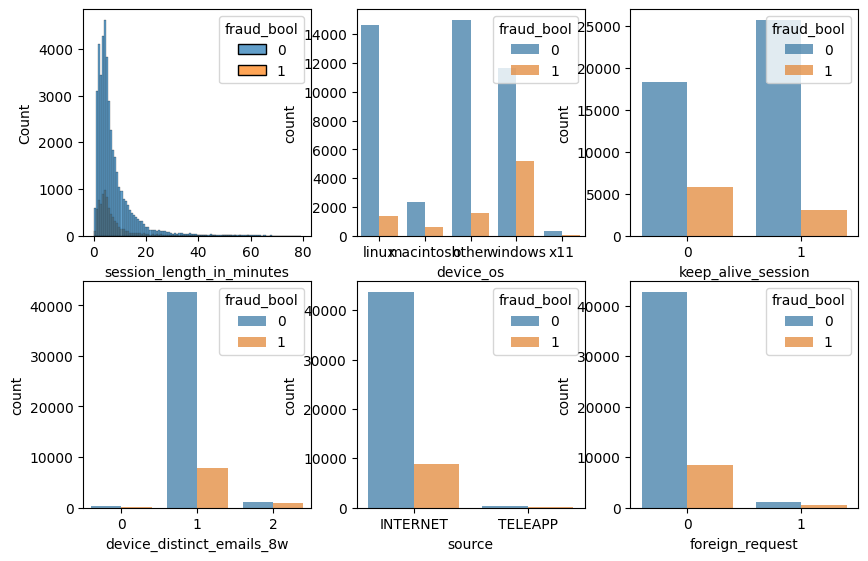

In [6]:
# for each column, if it is categorical, plot the value counts, if it is numerical, plot histogram
# put in a 3 x 3 grid, and color code the fraud_bool column
# print all except the first column
plt.figure(figsize=(10, 10))
for i, col in enumerate(device_activity_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    if device_activity_df[col].dtype.name == 'category':
        sns.countplot(data=device_activity_df, x=col, hue='fraud_bool', alpha=0.7)
    else:
        sns.histplot(data=device_activity_df, x=col, hue='fraud_bool', bins=100, alpha=0.7)

* `device_os`, `keep_alive_session`, `device_distinct_emails_8w`, `source`, `foreign_request` all does not have a similar ratio.
* Undersampled ratio is 1:5, thus, if a categorical column does not influence whether or not the bank application is fraud, then we would expect the ratio to be also 1:5. Thus, any deviation from this is a sign there might be some form of fraud pattern that we can leverage on.

                 column_name   category     fraud  non_fraud
0                  device_os  macintosh  0.201498   0.798502
0                  device_os      other  0.095143   0.904857
0                  device_os    windows  0.307911   0.692089
0                  device_os      linux  0.086747   0.913253
0                  device_os        x11  0.168766   0.831234
0         keep_alive_session          0  0.240405   0.759595
0         keep_alive_session          1  0.105493   0.894507
0                     source   INTERNET  0.166663   0.833337
0                     source    TELEAPP  0.241158   0.758842
0            foreign_request          0  0.163607   0.836393
0            foreign_request          1  0.277264   0.722736
0  device_distinct_emails_8w          1  0.155773   0.844227
0  device_distinct_emails_8w          2  0.439457   0.560543
0  device_distinct_emails_8w          0  0.323077   0.676923


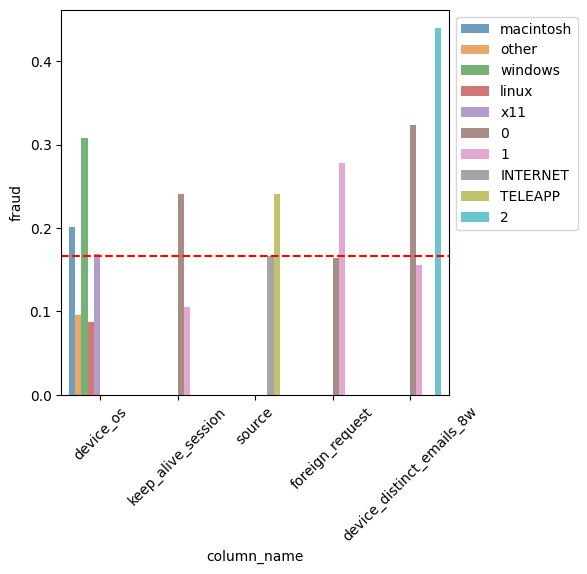

In [7]:
# check proportion of fraud vs non-fraud within each category
categorical_columns = ['fraud_bool', 'device_os', 'keep_alive_session', 'source', 'foreign_request', 'device_distinct_emails_8w']
device_activity_df_cat = device_activity_df[categorical_columns]

# caluclate proportion of fraud vs non-fraud for each category
fraud_proportion = pd.DataFrame(columns=['column_name', 'category', 'fraud', 'non_fraud'])
for col in device_activity_df_cat.columns[1:]:
    for cat in device_activity_df_cat[col].unique():
        fraud = len(device_activity_df_cat[(device_activity_df_cat[col] == cat) & (device_activity_df_cat['fraud_bool'] == 1)]) / len(device_activity_df_cat[device_activity_df_cat[col] == cat])
        non_fraud = len(device_activity_df_cat[(device_activity_df_cat[col] == cat) & (device_activity_df_cat['fraud_bool'] == 0)]) / len(device_activity_df_cat[device_activity_df_cat[col] == cat])

        # add to dataframe using pd.concat to row
        fraud_proportion = pd.concat([fraud_proportion, pd.DataFrame({'column_name': [col], 'category': [cat], 'fraud': [fraud], 'non_fraud': [non_fraud]})])

# print table
print(fraud_proportion)

plt.figure(figsize=(5, 5))
sns.barplot(data=fraud_proportion, x='column_name', y='fraud', hue='category', alpha=0.7)
plt.axhline(y=1/6, color='r', linestyle='--')
plt.xticks(rotation=45)
# legend is outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

* This graph is a clearer representation of which categories can be leveraged on for predicting fraud.
* Those above the red dotted line is considered significant.
* However, taking into account these proportions are not sufficient to determine which features could be utilized. This is because the size of the category also matters. If the size is too small, the value of the proportion is not reflective of the true proportion. For example, if there are only 2 data points in a fraud cateogry and ratio of fraud to non-fraud is 1:1, then it is 50% chance of fraud, but there is a lack of data points within this category. Thus we need to take into consideration the **size** of the categories as well.

In [8]:
def getFraudInfo(group):
    # get total count of fraud within this group
    fraud_count = group['fraud_bool'].value_counts().to_frame().loc[1, "count"]
    total_count = group.shape[0]
    fraud_proportion = round(fraud_count / total_count, 4)

    group['num_fraud'] = fraud_count
    group['proportion_of_fraud_in_group'] = fraud_proportion
    return group[['num_fraud', 'proportion_of_fraud_in_group']].drop_duplicates()

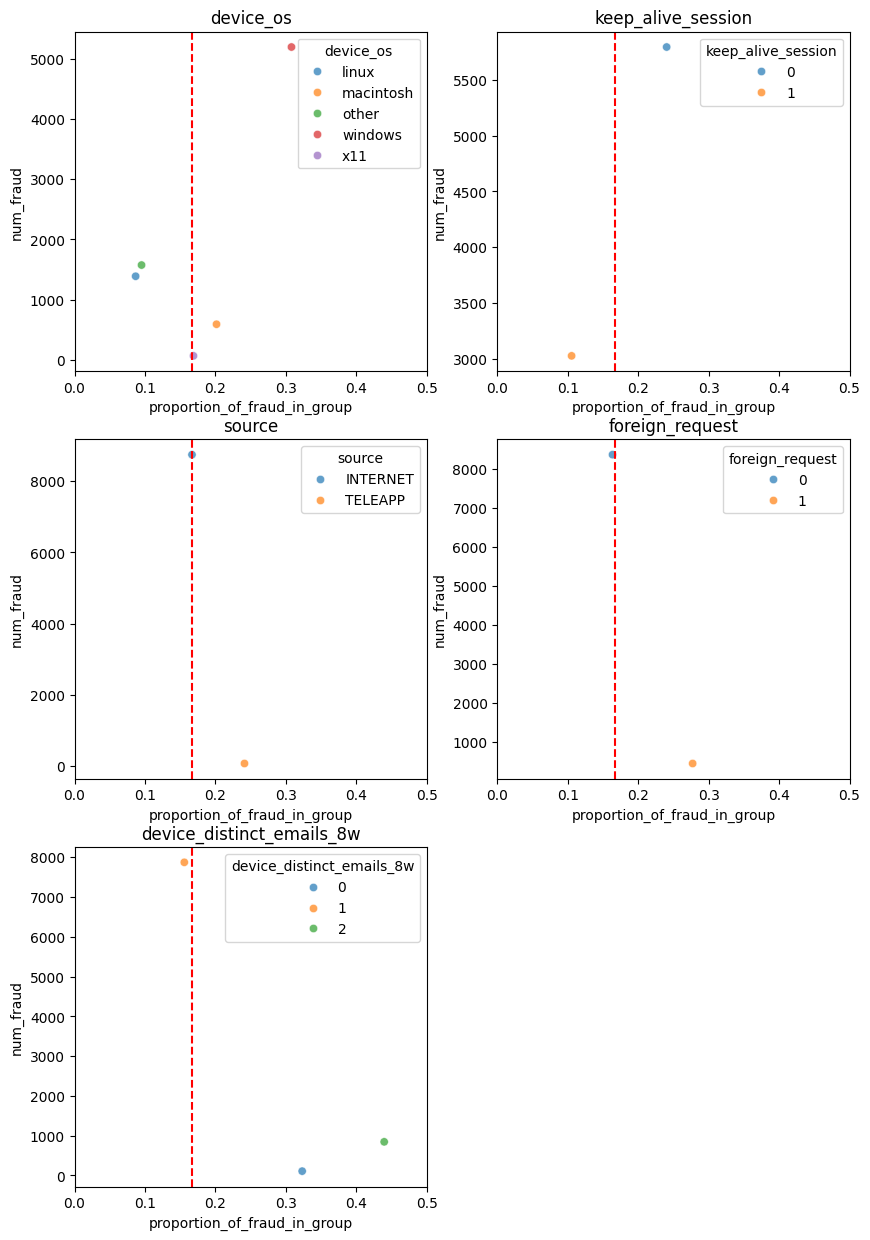

In [9]:
# given each column in device_activity_df_cat, group by that column and get the fraud info
# put that result in a dataframe, and plot the dataframe, with x-axis as 'proportion_of_fraud_in_group', y-axis as 'num_fraud', and a dotted vertical line at x = 1/6, colored red
# plot in a 3 x 2 grid
plt.figure(figsize=(10, 15))
i = 0
for col in device_activity_df_cat.columns[1:]:
    col_info = device_activity_df_cat.groupby(col).apply(getFraudInfo).reset_index()
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=col_info, x='proportion_of_fraud_in_group', y='num_fraud', hue=col, alpha=0.7)
    plt.axvline(x=1/6, color='r', linestyle='--')
    plt.title(f'{col}')
    plt.xlim(0, 0.5)
    i += 1

**Ideally, we would want to find feature engineered columns that can group feature to the top-right corner of the graph.**

* High proportion of fraud within that group and high number of fraud cases.

In [10]:
total_fraud_count = device_activity_df['fraud_bool'].value_counts().to_frame().loc[1, "count"]
total_non_fraud_count = device_activity_df['fraud_bool'].value_counts().to_frame().loc[0, "count"]

# print total counts of fraud and non-fraud
print(f"Total Fraud Count: {total_fraud_count}")
print(f"Total Non-Fraud Count: {total_non_fraud_count}")
print(f"Total Count: {total_fraud_count + total_non_fraud_count} \t Data Shape: {device_activity_df.shape}")

Total Fraud Count: 8819
Total Non-Fraud Count: 43957
Total Count: 52776 	 Data Shape: (52776, 7)


In [11]:
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 7)


,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request
0,0,20.301149,macintosh,0,1,INTERNET,0
1,0,4.309454,other,1,1,INTERNET,0
2,0,4.491135,other,0,1,INTERNET,0
3,0,1.507028,windows,1,2,INTERNET,0
4,0,2.000494,linux,1,1,INTERNET,0


## Feature 1. Use `device_os` and `device_distinct_emails_8w`

* If `device_os` == windows is more likely used as spare phones because of its low security and `device_distinct_emails_8w` is likely to be 0 or 2, then we can exploit this behaviour and create a new feature.
* Therefore, we can feature engineer a column of probabilies attached to different permutations of when they are grouped by `device_distinct_emails_8w` and `device_os`.

In [12]:
# feature engineering code for feature 1
group01 = device_activity_df[(device_activity_df['device_os'] == 'windows') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
group02 = device_activity_df[(device_activity_df['device_os'] == 'macintosh') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
group03 = device_activity_df[(device_activity_df['device_os'] == 'x11') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
group04 = device_activity_df[(device_activity_df['device_os'] == 'other') & (device_activity_df['device_distinct_emails_8w'].isin([0, 2]))]
# group05 will be all the groups except those in group01, group02, group03, group04
group05 = device_activity_df[~device_activity_df.index.isin(group01.index) & ~device_activity_df.index.isin(group02.index) & ~device_activity_df.index.isin(group03.index) & ~device_activity_df.index.isin(group04.index)]

# combine into 1 dataframe, add label to that dataframe, label each group 'A', 'B', 'C', 'D', 'E', all in new column 'FE_01'
group01['FE_01'] = 'windows_0_2'; group02['FE_01'] = 'mac_0_2'; group03['FE_01'] = 'x11_0_2'; group04['FE_01'] = 'other_0_2'; group05['FE_01'] = 'others'
device_activity_df = pd.concat([group01, group02, group03, group04, group05])

# change 'FE_01' to category
device_activity_df['FE_01'] = device_activity_df['FE_01'].astype('category')

# assign probability of fraud to each group
FE_01_prob_mapping = {"A": 0.6047,
                      "B": 0.4529,
                      "C": 0.3846,
                      "D": 0.2978,
                      "E": 0.1564}

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_01_device_os_emails_prob'] = device_activity_df['FE_01'].map(FE_01_prob_mapping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 9)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/887860295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_01'] = 'windows_0_2'; group02['FE_01'] = 'mac_0_2'; group03['FE_01'] = 'x11_0_2'; group04['FE_01'] = 'other_0_2'; group05['FE_01'] = 'others'
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/887860295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_01'] = 'windows_0_2'; group02['FE_01'] = 'mac_0_2'; group03['FE_01'] = 'x11_0_2'; group04['F

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request,FE_01,FE_01_device_os_emails_prob
3,0,1.507028,windows,1,2,INTERNET,0,windows_0_2,NaN
19,1,2.909931,windows,0,2,INTERNET,0,windows_0_2,NaN
105,0,19.697471,windows,0,2,INTERNET,0,windows_0_2,NaN
128,0,4.508612,windows,0,0,INTERNET,0,windows_0_2,NaN
151,1,30.256072,windows,0,2,INTERNET,0,windows_0_2,NaN


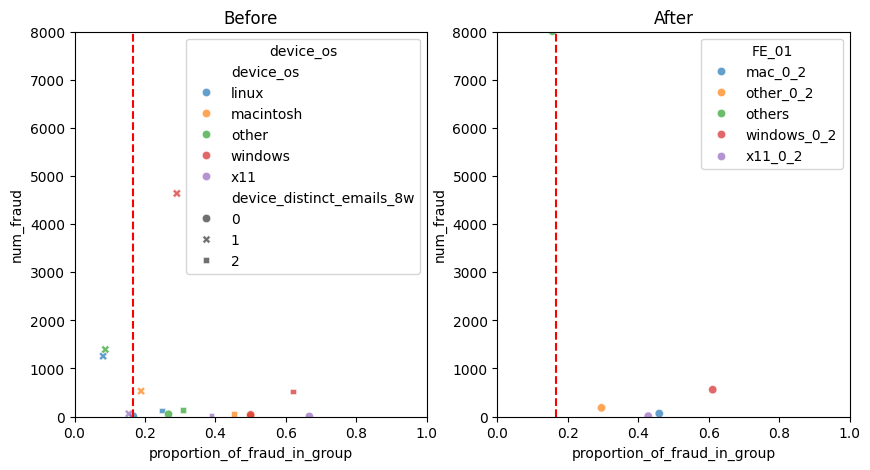

In [13]:
# plot before and after distribution of 'FE_01'
before_table = device_activity_df.groupby(['device_os', 'device_distinct_emails_8w']).apply(getFraudInfo).reset_index()
after_table = device_activity_df.groupby('FE_01').apply(getFraudInfo).reset_index()

# plot 2 tables side by side, add title, lables, legend
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=before_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='device_os', style='device_distinct_emails_8w', alpha=0.7, ax=axs[0])
sns.scatterplot(data=after_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='FE_01', alpha=0.7, ax=axs[1])
axs[0].axvline(x=1/6, color='r', linestyle='--')
axs[1].axvline(x=1/6, color='r', linestyle='--')
axs[0].set_title('Before')
axs[1].set_title('After')
axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)
axs[0].set_ylim(0, 8000)
axs[1].set_ylim(0, 8000)
# scale size of legend down and put top-right corner
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='device_os')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='FE_01')

## Feature 2. Use `keep_alive_session` and `device_distinct_emails_8w`

* If `device_distinct_emails_8w` == 0 or 2 is likely to be a spare phone, thus, I would expect it to have a close relationship with `keep_alive_session` == 0. This is because fraudsters would likely need the convienience to toggle between bank apps and prevent companies from tracking them down. Then we can exploit this behaviour and create a new feature.
* Therefore, we can feature engineer a column of probabilies attached to different permutations of when they are grouped by `device_distinct_emails_8w` and `keep_alive_session`.

In [14]:
# divide into 6 groups, one for each unique permutation of keep_alive_session and device_distinct_emails_8w
group01 = device_activity_df[(device_activity_df['keep_alive_session'] == 0) & (device_activity_df['device_distinct_emails_8w'] == 0)]
group02 = device_activity_df[(device_activity_df['keep_alive_session'] == 0) & (device_activity_df['device_distinct_emails_8w'] == 1)]
group03 = device_activity_df[(device_activity_df['keep_alive_session'] == 0) & (device_activity_df['device_distinct_emails_8w'] == 2)]
group04 = device_activity_df[(device_activity_df['keep_alive_session'] == 1) & (device_activity_df['device_distinct_emails_8w'] == 0)]
group05 = device_activity_df[(device_activity_df['keep_alive_session'] == 1) & (device_activity_df['device_distinct_emails_8w'] == 1)]
group06 = device_activity_df[(device_activity_df['keep_alive_session'] == 1) & (device_activity_df['device_distinct_emails_8w'] == 2)]

# label each group from "A" to "F"
group01['FE_02'] = "unalive_0"; group02['FE_02'] = "unalive_1"; group03['FE_02'] = "unalive_2"; group04['FE_02'] = "alive_0"; group05['FE_02'] = "alive_1"; group06['FE_02'] = "alive_2"

# concatenate all the group
device_activity_df = pd.concat([group01, group02, group03, group04, group05, group06])

# change 'FE_02' to category
device_activity_df['FE_02'] = device_activity_df['FE_02'].astype('category')

# generate mapping
FE_02_prob_mappping = {"A": 0.3520,
                       "B": 0.2230,
                       "C": 0.4732,
                       "D": 0.1591,
                       "E": 0.1016,
                       "F": 0.3131
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_02_keep_alive_device_emails_prob'] = device_activity_df['FE_02'].map(FE_02_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 11)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/4154933995.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_02'] = "unalive_0"; group02['FE_02'] = "unalive_1"; group03['FE_02'] = "unalive_2"; group04['FE_02'] = "alive_0"; group05['FE_02'] = "alive_1"; group06['FE_02'] = "alive_2"
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/4154933995.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_02'] = "unalive_0"; group02['FE_02'] = "unalive_1"; group03

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request,FE_01,FE_01_device_os_emails_prob,FE_02,FE_02_keep_alive_device_emails_prob
128,0,4.508612,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN
1422,1,3.560275,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN
1572,0,3.535784,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN
2380,0,6.786212,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN
2739,1,6.204049,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN


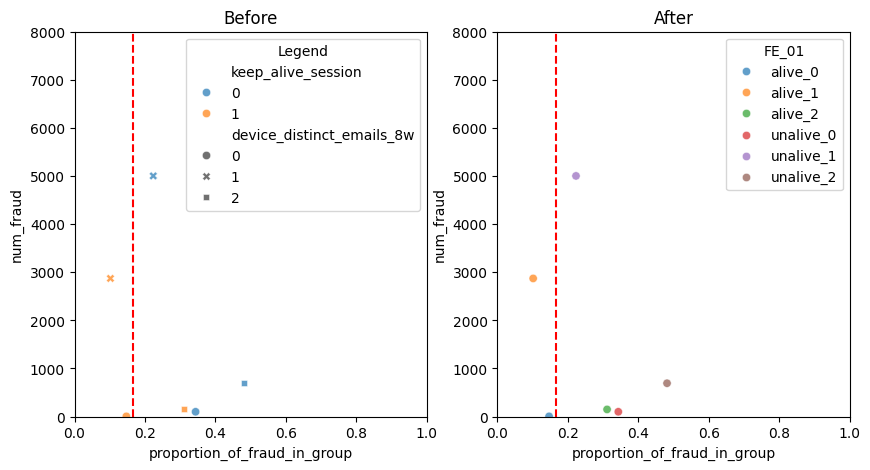

In [15]:
# plot before and after distribution of 'FE_01'
before_table = device_activity_df.groupby(['keep_alive_session', 'device_distinct_emails_8w']).apply(getFraudInfo).reset_index()
after_table = device_activity_df.groupby('FE_02').apply(getFraudInfo).reset_index()

# plot 2 tables side by side, add title, lables, legend
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=before_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='keep_alive_session', style='device_distinct_emails_8w', alpha=0.7, ax=axs[0])
sns.scatterplot(data=after_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='FE_02', alpha=0.7, ax=axs[1])
axs[0].axvline(x=1/6, color='r', linestyle='--')
axs[1].axvline(x=1/6, color='r', linestyle='--')
axs[0].set_title('Before')
axs[1].set_title('After')
axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)
axs[0].set_ylim(0, 8000)
axs[1].set_ylim(0, 8000)
# scale size of legend down and put top-right corner
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Legend')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='FE_01')

* Note that comparative to Feature 1, I intentionally did not perform any form of grouping of the subgroups because in of 2 reasons:
    1. There is a clear distinction of columns that have fraud and non-fraud between these subgroups, unlike Feature 1.
    2. In Feature 1, some groups have very very low count of categories in each group, therefore, I need to group them together to approximate a better distribution.

## Feature 3. Use `foreign_request` and `source`

* If `foreign_request` == 1 and `source` == "INTERNET" there is a higher chance of being fraud. This is because spoofing location (when using VPN - to prevent tracking) is easier done on the internet. Similarly, using the "TELEAPP" exposes more information about the device to the company. Thus, we can exploit this behaviour and create a new feature.
* Therefore, we can feature engineer a column of probabilies attached to different permutations of when they are grouped by `foreign_request` and `source`.

In [16]:
# divide into 4 groups, one for each unique permutation of foreign_request and source
group01 = device_activity_df[(device_activity_df['source'] == "INTERNET") & (device_activity_df['foreign_request'] == 0)]
group02 = device_activity_df[(device_activity_df['source'] == "INTERNET") & (device_activity_df['foreign_request'] == 1)]
group04 = device_activity_df[(device_activity_df['source'] == "TELEAPP") & (device_activity_df['foreign_request'] == 0)]
group03 = device_activity_df[(device_activity_df['source'] == "TELEAPP") & (device_activity_df['foreign_request'] == 1)]

# label each group from "A" to "D", label_name = "FE_03"
group01['FE_03'] = "internet_local"; group02['FE_03'] = "internet_foreign"; group03['FE_03'] = "teleapp_local"; group04['FE_03'] = "teleapp_foreign"


# concatenate all the group
device_activity_df = pd.concat([group01, group02, group03, group04])

# change 'FE_02' to category
device_activity_df['FE_03'] = device_activity_df['FE_03'].astype('category')

# generate mapping
FE_03_prob_mappping = {"A": 0.1627,
                       "B": 0.2782,
                       "C": 0.2448,
                       "D": 0.5000
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_03_source_foreign_request_prob'] = device_activity_df['FE_03'].map(FE_02_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 13)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/3141537729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_03'] = "internet_local"; group02['FE_03'] = "internet_foreign"; group03['FE_03'] = "teleapp_local"; group04['FE_03'] = "teleapp_foreign"
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/3141537729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_03'] = "internet_local"; group02['FE_03'] = "internet_foreign"; group03['FE_03'] = "teleapp_local

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request,FE_01,FE_01_device_os_emails_prob,FE_02,FE_02_keep_alive_device_emails_prob,FE_03,FE_03_source_foreign_request_prob
128,0,4.508612,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN
1422,1,3.560275,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN
1572,0,3.535784,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN
2380,0,6.786212,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN
2739,1,6.204049,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN


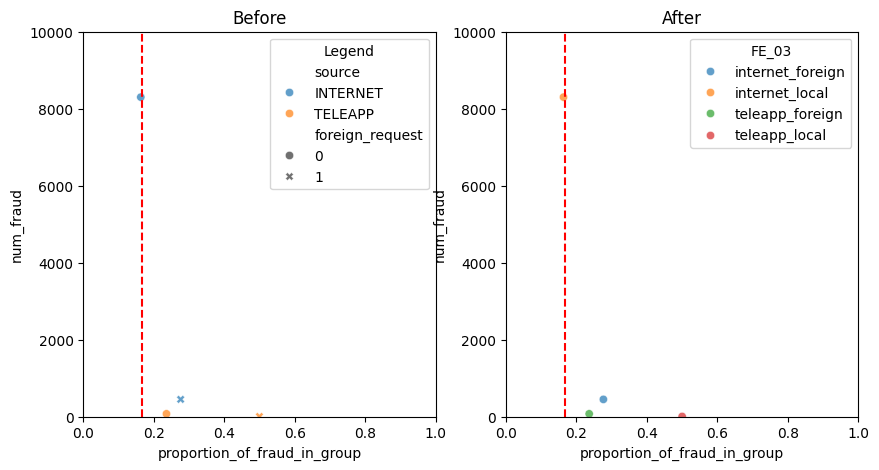

In [17]:
# plot before and after distribution of 'FE_03'
before_table = device_activity_df.groupby(['foreign_request', 'source']).apply(getFraudInfo).reset_index()
after_table = device_activity_df.groupby('FE_03').apply(getFraudInfo).reset_index()

# plot 2 tables side by side, add title, lables, legend
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=before_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='source', style='foreign_request', alpha=0.7, ax=axs[0])
sns.scatterplot(data=after_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='FE_03', alpha=0.7, ax=axs[1])
axs[0].axvline(x=1/6, color='r', linestyle='--')
axs[1].axvline(x=1/6, color='r', linestyle='--')
axs[0].set_title('Before')
axs[1].set_title('After')
axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)
axs[0].set_ylim(0, 10000)
axs[1].set_ylim(0, 10000)
# add legend
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Legend')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='FE_03')


* Similarly, I only assign probability distributions because:
    1. Too little groups to group.
    2. Due to low count number of fraud cases in case "teleapp_fraud" (3 rows), I penalized it with a lower probability (i.e. just using the mean probability (1/6) because it is not representative of the true distribution).

## Feature 4. Use `device_os` and `source`

* If `device_os` == "windows" and `source` == "INTERNET" there is a higher chance of being fraud. This is because devices that have less security is more likely to be targets, especially windows. Similarly, using the "TELEAPP" exposes more information about the device to the company. Thus, we can exploit this behaviour and create a new feature.
* Therefore, we can feature engineer a column of probabilies attached to different permutations of when they are grouped by `device_os` and `source`.

In [18]:
# group into 4 groups
# divide into 4 groups, one for each unique permutation of foreign_request and source
group01 = device_activity_df[(device_activity_df['device_os'] == "windows") & (device_activity_df['foreign_request'] == 0)]
group02 = device_activity_df[(device_activity_df['device_os'] == "windows") & (device_activity_df['foreign_request'] == 1)]
group03 = device_activity_df[(device_activity_df['device_os'] == "macintosh") & (device_activity_df['foreign_request'] == 0)]
group04 = device_activity_df[~device_activity_df.index.isin(group01.index) & ~device_activity_df.index.isin(group02.index) & ~device_activity_df.index.isin(group03.index)]

# label each group from "A" to "D", label_name = "FE_03"
group01['FE_04'] = "windows_local"; group02['FE_04'] = "windows_foreign"; group03['FE_04'] = "mac_local"; group04['FE_04'] = "others"


# concatenate all the group
device_activity_df = pd.concat([group01, group02, group03, group04])

# change 'FE_04' to category
device_activity_df['FE_04'] = device_activity_df['FE_04'].astype('category')

# generate mapping
FE_04_prob_mappping = {"A": 0.3027,
                       "B": 0.4605,
                       "C": 0.2010,
                       "D": 0.0916
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_04_device_os_foreign_request'] = device_activity_df['FE_04'].map(FE_04_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 15)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/1070116447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_04'] = "windows_local"; group02['FE_04'] = "windows_foreign"; group03['FE_04'] = "mac_local"; group04['FE_04'] = "others"
/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_4432/1070116447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group01['FE_04'] = "windows_local"; group02['FE_04'] = "windows_foreign"; group03['FE_04'] = "mac_local"; group04['FE_04'] =

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request,FE_01,FE_01_device_os_emails_prob,FE_02,FE_02_keep_alive_device_emails_prob,FE_03,FE_03_source_foreign_request_prob,FE_04,FE_04_device_os_foreign_request
128,0,4.508612,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN
1422,1,3.560275,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN
1572,0,3.535784,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN
2380,0,6.786212,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN
2739,1,6.204049,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN


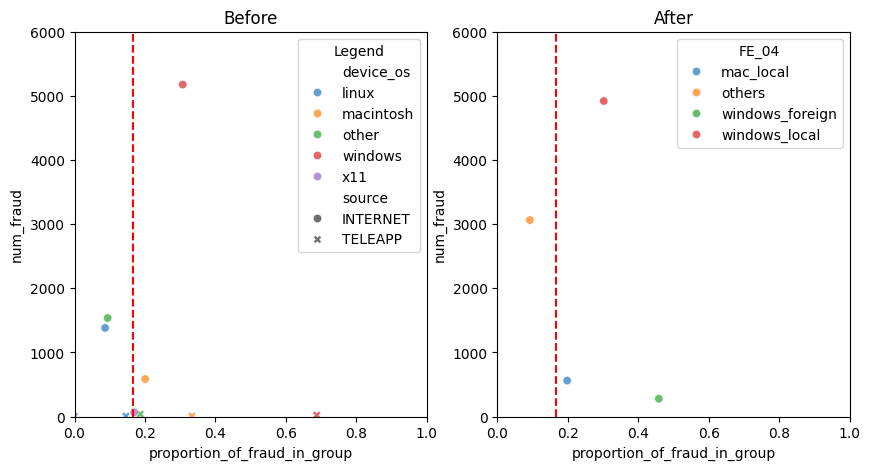

In [19]:
# plot before and after distribution of 'FE_04'
before_table = device_activity_df.groupby(['device_os', 'source']).apply(getFraudInfo).reset_index()
after_table = device_activity_df.groupby('FE_04').apply(getFraudInfo).reset_index()

# plot 2 tables side by side, add title, lables, legend
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=before_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='device_os', style='source', alpha=0.7, ax=axs[0])
sns.scatterplot(data=after_table, x='proportion_of_fraud_in_group', y='num_fraud', hue='FE_04', alpha=0.7, ax=axs[1])
axs[0].axvline(x=1/6, color='r', linestyle='--')
axs[1].axvline(x=1/6, color='r', linestyle='--')
axs[0].set_title('Before')
axs[1].set_title('After')
axs[0].set_xlim(0, 1)
axs[1].set_xlim(0, 1)
axs[0].set_ylim(0, 6000)
axs[1].set_ylim(0, 6000)
# add legend
axs[0].legend(loc='upper right', bbox_to_anchor=(1, 1), title='Legend')
axs[1].legend(loc='upper right', bbox_to_anchor=(1, 1), title='FE_04')


* Performed and split into 4 groupings:
    1. Windows devices have higher chance of commiting fraud, thus leaving it separate.
    2. Grouped mac devices together because of low count of fraud cases in of the mac_foreign.
    3. Grouped all others together because they are not significant.

## Feature 5: Assign probabilites to the groups to imply an order.

* Assign probabilities to device_os instead of using categories because we want to have some sort of priority over the more important groups, so that during the model training process, the model can capture this relationship.

In [20]:
# assign mapp probability
# generate mapping
FE_05_prob_mappping = {"windows": 0.3083,
                       "macintosh": 0.2041,
                       "linux": 0.0001,
                       "other": 0.0001,
                       "x11": 0.0001
                       }

# map the probability of fraud to the device_acitivtiy_df, as a new column 'FE_01_device_os_emails_prob'
device_activity_df['FE_05_device_os'] = device_activity_df['device_os'].map(FE_05_prob_mappping)

# check shape and head
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

device_activity_df shape: (52776, 16)


,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request,FE_01,FE_01_device_os_emails_prob,FE_02,FE_02_keep_alive_device_emails_prob,FE_03,FE_03_source_foreign_request_prob,FE_04,FE_04_device_os_foreign_request,FE_05_device_os
128,0,4.508612,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN,0.3083
1422,1,3.560275,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN,0.3083
1572,0,3.535784,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN,0.3083
2380,0,6.786212,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN,0.3083
2739,1,6.204049,windows,0,0,INTERNET,0,windows_0_2,NaN,unalive_0,NaN,internet_local,NaN,windows_local,NaN,0.3083
